<a href="https://colab.research.google.com/github/Sjuzanna777/test/blob/master/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%A4%D0%B8%D0%BE%D0%BD%D0%BA%D0%B8%D0%BD%D0%B0_%D0%A1_%D0%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

# install findspark using pip
!pip install -q findspark

import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
import pyspark.sql.functions

**загрузить данные в Google Sheets **


In [7]:
!wget https://raw.githubusercontent.com/Sjuzanna777/test/master/u.user.csv
!wget https://raw.githubusercontent.com/Sjuzanna777/test/master/u.item.csv
!wget https://raw.githubusercontent.com/Sjuzanna777/test/master/u.data.csv

--2020-09-16 08:35:21--  https://raw.githubusercontent.com/Sjuzanna777/test/master/u.user.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22628 (22K) [text/plain]
Saving to: ‘u.user.csv.1’

u.user.csv.1        100%[===================>]  22.10K  --.-KB/s    in 0.004s  

2020-09-16 08:35:21 (5.25 MB/s) - ‘u.user.csv.1’ saved [22628/22628]

--2020-09-16 08:35:21--  https://raw.githubusercontent.com/Sjuzanna777/test/master/u.item.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236344 (231K) [text/plain]
Saving to: ‘u.item.csv.1’

u.ite

In [8]:
df_users = spark.read.csv('u.user.csv', inferSchema=True, sep='|')

df_item = spark.read.csv('u.item.csv', inferSchema=True, sep='|')

In [9]:
df_users.show(10)

+---+---+---+-------------+-----+
|_c0|_c1|_c2|          _c3|  _c4|
+---+---+---+-------------+-----+
|  1| 24|  M|   technician|85711|
|  2| 53|  F|        other|94043|
|  3| 23|  M|       writer|32067|
|  4| 24|  M|   technician|43537|
|  5| 33|  F|        other|15213|
|  6| 42|  M|    executive|98101|
|  7| 57|  M|administrator|91344|
|  8| 36|  M|administrator|05201|
|  9| 29|  M|      student|01002|
| 10| 53|  M|       lawyer|90703|
+---+---+---+-------------+-----+
only showing top 10 rows



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Построить гистограмму пользователей по возрасту**

In [11]:
to_show_1 = df_users.groupby('_c1').count().orderBy('_c1')
to_show_1= to_show_1.withColumnRenamed('_c1','age')

to_show_1.show(10)

+---+-----+
|age|count|
+---+-----+
|  7|    1|
| 10|    1|
| 11|    1|
| 13|    5|
| 14|    3|
| 15|    6|
| 16|    5|
| 17|   14|
| 18|   18|
| 19|   23|
+---+-----+
only showing top 10 rows



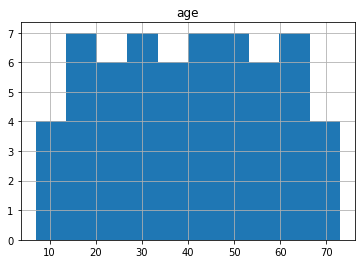

In [12]:
pd_df_1 = to_show_1.toPandas()

h = pd_df_1['age'].hist().set_title('age')

**Построить 2 графика, показывающих распределение людей по профессиям в зависимости от их пола**


*Мужские профессии*


In [13]:
to_show_2_M = df_users.where((df_users['_c2']=='M'))

In [14]:
to_show_2_M = to_show_2_M.groupby('_c3').count()
to_show_2_M.show()

+-------------+-----+
|          _c3|count|
+-------------+-----+
|    librarian|   22|
|      retired|   13|
|       lawyer|   10|
|         none|    5|
|       writer|   26|
|   programmer|   60|
|    marketing|   16|
|        other|   69|
|    executive|   29|
|    scientist|   28|
|      student|  136|
|     salesman|    9|
|       artist|   15|
|   technician|   26|
|administrator|   43|
|     engineer|   65|
|   healthcare|    5|
|     educator|   69|
|entertainment|   16|
|    homemaker|    1|
+-------------+-----+
only showing top 20 rows



In [15]:
to_show_2_M= to_show_2_M.withColumnRenamed('_c3','profession')
to_show_2_M.orderBy('count')

DataFrame[profession: string, count: bigint]

In [16]:
pd_df_M = to_show_2_M.toPandas()

In [17]:
profession_M = [p.profession for p in to_show_2_M[['profession']].collect()]
count_M = [c.count for c in to_show_2_M[['count']].collect()]

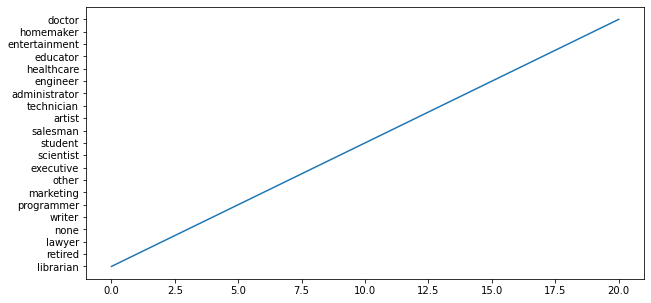

In [18]:
plt.figure(figsize=(10,5))
plt.plot(profession_M, data = count_M)
plt.show()

*Женские профессии*


In [19]:
to_show_2_F = df_users.where((df_users['_c2']=='F'))

In [20]:
to_show_2_F = to_show_2_F.groupby('_c3').count()
to_show_2_F.show()

+-------------+-----+
|          _c3|count|
+-------------+-----+
|    librarian|   29|
|      retired|    1|
|       lawyer|    2|
|         none|    4|
|       writer|   19|
|   programmer|    6|
|    marketing|   10|
|        other|   36|
|    executive|    3|
|    scientist|    3|
|      student|   60|
|     salesman|    3|
|       artist|   13|
|   technician|    1|
|administrator|   36|
|     engineer|    2|
|   healthcare|   11|
|     educator|   26|
|entertainment|    2|
|    homemaker|    6|
+-------------+-----+



In [21]:
to_show_2_F= to_show_2_F.withColumnRenamed('_c3','profession')
to_show_2_F = to_show_2_F.orderBy('count')

In [22]:
pd_df_F = to_show_2_F.toPandas()

In [23]:
profession_F = [p.profession for p in to_show_2_F[['profession']].collect()]
count_F = [c.count for c in to_show_2_F[['count']].collect()]

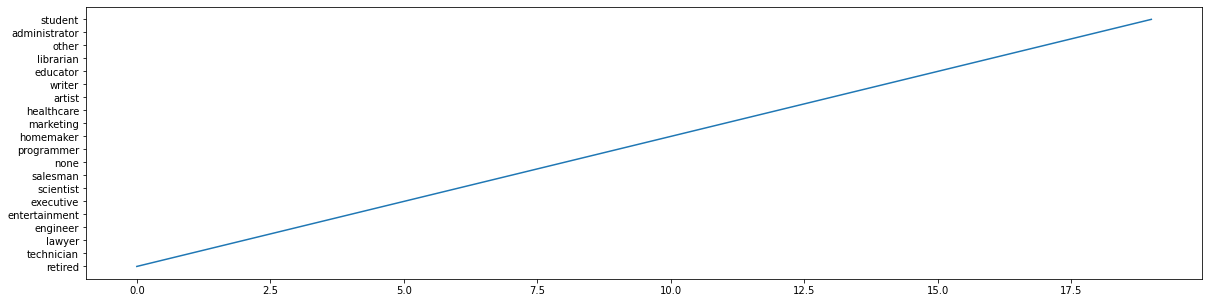

In [24]:
plt.figure(figsize=(20,5))
plt.plot(profession_F, data = to_show_2_F)
plt.show()

In [25]:
df_users.createOrReplaceTempView('power')

In [26]:
df_total = spark.sql('SELECT  _c3,_c2, count(_c1) FROM power GROUP BY _c3, _c2')

In [27]:
df_total.show(5)

+-------------+---+----------+
|          _c3|_c2|count(_c1)|
+-------------+---+----------+
|   technician|  M|        26|
|     educator|  F|        26|
|       lawyer|  F|         2|
|entertainment|  F|         2|
|       lawyer|  M|        10|
+-------------+---+----------+
only showing top 5 rows



In [28]:
gender = df_total.toPandas()

In [29]:
c3 = [p._c3 for p in df_total[['_c3']].collect()]
c2 = [c._c2 for c in df_total[['_c2']].collect()]
cc1 = [cc.count for cc in df_total[['count(_c1)']].collect()]

Text(0, 0.5, 'count')

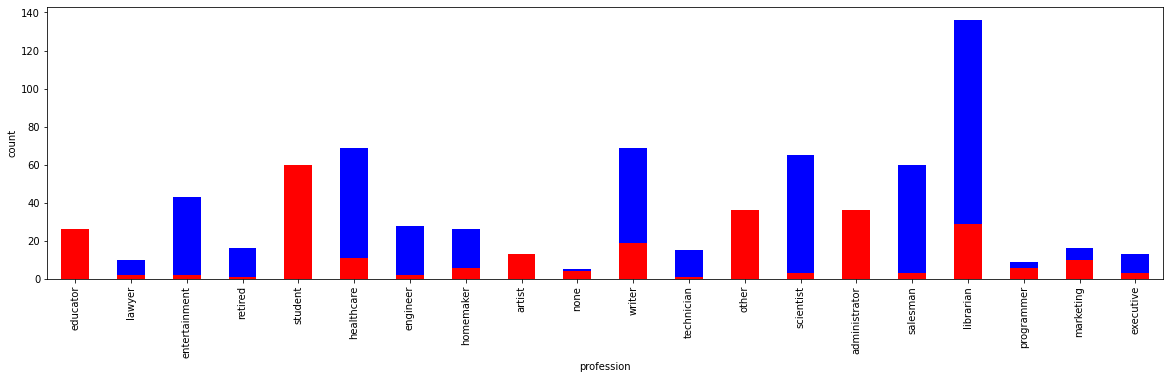

In [30]:
gender[ gender['_c2'] == 'M'].set_index('_c3')['count(_c1)'].plot( kind='bar',color = 'blue', figsize=(20,5))
gender[ gender['_c2'] == 'F'].set_index('_c3')['count(_c1)'].plot( kind='bar',color = 'red', figsize=(20,5))
plt.xlabel('profession')
plt.ylabel('count')

**Построить график количества фильмов по жанрам**

In [31]:
df_item.show()

+---+--------------------+-----------+----+--------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|_c0|                 _c1|        _c2| _c3|                 _c4|_c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|
+---+--------------------+-----------+----+--------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|  1|    Toy Story (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  0|  0|  1|  1|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|
|  2|    GoldenEye (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  1|  1|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|
|  3|   Four Rooms (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  0|  0|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|
|  4|   Get Shorty (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  

In [32]:
df_item.createOrReplaceTempView('item')

In [33]:
df_item_film = spark.sql('SELECT sum (_c6)as Action, sum (_c7)as Adventure, sum (_c8)as Animation,sum (_c9)as Childrens,sum (_c10)as Comedy,sum (_c11)as Crime,sum (_c12)as Documentary,sum (_c13)as Drama,sum (_c14)as Fantasy, sum (_c15)as Film_Noir,sum (_c16)as Horror, sum (_c17)as Musical,sum (_c18)as Mystery,sum (_c19)as Romance,sum (_c20)as Sci_Fi, sum (_c21)as Thriller, sum (_c22)as War,sum (_c23)as Western FROM item ')
df_item_film.show()
df_item_film.describe()

+------+---------+---------+---------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|Action|Adventure|Animation|Childrens|Comedy|Crime|Documentary|Drama|Fantasy|Film_Noir|Horror|Musical|Mystery|Romance|Sci_Fi|Thriller|War|Western|
+------+---------+---------+---------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|   251|      135|       42|      122|   505|  109|         50|  725|     22|       24|    92|     56|     61|    247|   101|     251| 71|     27|
+------+---------+---------+---------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+



DataFrame[summary: string, Action: string, Adventure: string, Animation: string, Childrens: string, Comedy: string, Crime: string, Documentary: string, Drama: string, Fantasy: string, Film_Noir: string, Horror: string, Musical: string, Mystery: string, Romance: string, Sci_Fi: string, Thriller: string, War: string, Western: string]

In [34]:
df_item_film.collect()

[Row(Action=251, Adventure=135, Animation=42, Childrens=122, Comedy=505, Crime=109, Documentary=50, Drama=725, Fantasy=22, Film_Noir=24, Horror=92, Musical=56, Mystery=61, Romance=247, Sci_Fi=101, Thriller=251, War=71, Western=27)]

In [35]:
df_item_film_p =df_item_film.toPandas()

Text(0, 0.5, 'count')

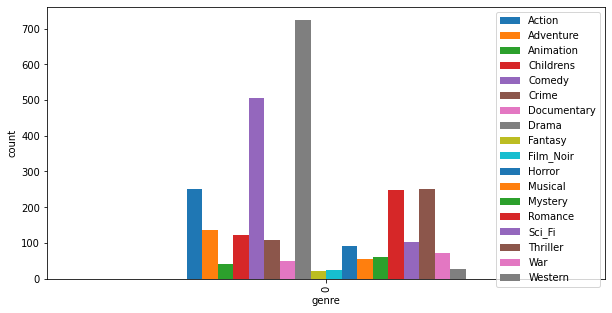

In [36]:
df_item_film_p.plot(kind = 'bar',figsize=(10,5))

plt.xlabel('genre')
plt.ylabel('count')

**Построить график количества фильмов по годам**


In [58]:
# from pyspark.sql.types import DateType
# df_item.select(df_item._c2.cast(DateType()).alias('datetime.year'))

DataFrame[datetime.year: date]

In [75]:
df_item.createOrReplaceTempView('item2')

In [90]:
df_item_2 = spark.sql('SELECT _c2 as data, _c1  FROM item2')
df_item_2.show(2)

+-----------+----------------+
|       data|             _c1|
+-----------+----------------+
|01-Jan-1995|Toy Story (1995)|
|01-Jan-1995|GoldenEye (1995)|
+-----------+----------------+
only showing top 2 rows



In [96]:
from pyspark.sql.functions import *

In [97]:
year_f =df_item_2.withColumn('data_year', expr('substring(data,-4,length(data)-1)'))

In [100]:
year_f['data_year','_c1'].show(2)

+---------+----------------+
|data_year|             _c1|
+---------+----------------+
|     1995|Toy Story (1995)|
|     1995|GoldenEye (1995)|
+---------+----------------+
only showing top 2 rows



In [101]:
pic_film = year_f.groupBy('data_year').count()

In [102]:
c= pic_film.dropna()

In [103]:
c.show(5)
# pic_film.describe()

+---------+-----+
|data_year|count|
+---------+-----+
|     1953|    2|
|     1957|    8|
|     1987|   13|
|     1956|    4|
|     1936|    2|
+---------+-----+
only showing top 5 rows



In [104]:
c.collect()

[Row(data_year='1953', count=2),
 Row(data_year='1957', count=8),
 Row(data_year='1987', count=13),
 Row(data_year='1956', count=4),
 Row(data_year='1936', count=2),
 Row(data_year='1958', count=9),
 Row(data_year='1943', count=4),
 Row(data_year='1972', count=3),
 Row(data_year='1931', count=1),
 Row(data_year='1988', count=11),
 Row(data_year='1938', count=3),
 Row(data_year='1926', count=1),
 Row(data_year='1932', count=1),
 Row(data_year='1977', count=4),
 Row(data_year='1971', count=7),
 Row(data_year='1984', count=8),
 Row(data_year='1982', count=13),
 Row(data_year='1941', count=5),
 Row(data_year='1965', count=5),
 Row(data_year='1962', count=5),
 Row(data_year='1954', count=7),
 Row(data_year='1930', count=1),
 Row(data_year='1981', count=12),
 Row(data_year='1940', count=8),
 Row(data_year='1978', count=4),
 Row(data_year='1974', count=8),
 Row(data_year='1959', count=4),
 Row(data_year='1995', count=219),
 Row(data_year='1964', count=2),
 Row(data_year='1946', count=5),
 Row

In [105]:
cf=c.toPandas()

Text(0, 0.5, 'count')

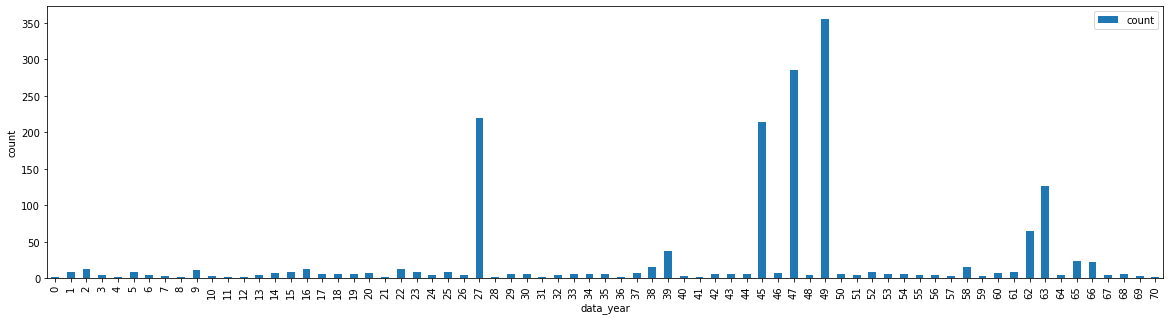

In [106]:
# cf.plot()
cf.plot( kind = 'bar',figsize=(20,5))

plt.xlabel('data_year')
plt.ylabel('count')

*Построить график количества оценок по месяцам и годам *




In [124]:
df_data = spark.read.csv('u.data.csv', header=False, inferSchema=False, sep='\t')

In [125]:
df_data.show(5)

+---+---+---+---------+
|_c0|_c1|_c2|      _c3|
+---+---+---+---------+
|196|242|  3|881250949|
|186|302|  3|891717742|
| 22|377|  1|878887116|
|244| 51|  2|880606923|
|166|346|  1|886397596|
+---+---+---+---------+
only showing top 5 rows



In [131]:
df_data.describe()

DataFrame[summary: string, _c0: string, _c1: string, _c2: string, _c3: string]

In [132]:
df_data = df_data.withColumnRenamed('_c0','user_id') 
df_data = df_data.withColumnRenamed('_c1','item_id')
df_data = df_data.withColumnRenamed('_c2','rating')
df_data = df_data.withColumnRenamed('_c3','timestamp')

In [133]:
df_data.show(2)

+-------+-------+------+---------+
|user_id|item_id|rating|timestamp|
+-------+-------+------+---------+
|    196|    242|     3|881250949|
|    186|    302|     3|891717742|
+-------+-------+------+---------+
only showing top 2 rows



In [210]:
# df_datd_f =df_data.withColumn('month_year', (array(df_data['timestamp']/86400)+date_trunc))
# (1970,1,1)
df_datd_f =df_data.withColumn('month_year',from_unixtime (df_data['timestamp'], format = 'yyyy-MM'))
# (1970,1,1)

In [211]:
df_datd_f.show()

+-------+-------+------+---------+----------+
|user_id|item_id|rating|timestamp|month_year|
+-------+-------+------+---------+----------+
|    196|    242|     3|881250949|   1997-12|
|    186|    302|     3|891717742|   1998-04|
|     22|    377|     1|878887116|   1997-11|
|    244|     51|     2|880606923|   1997-11|
|    166|    346|     1|886397596|   1998-02|
|    298|    474|     4|884182806|   1998-01|
|    115|    265|     2|881171488|   1997-12|
|    253|    465|     5|891628467|   1998-04|
|    305|    451|     3|886324817|   1998-02|
|      6|     86|     3|883603013|   1997-12|
|     62|    257|     2|879372434|   1997-11|
|    286|   1014|     5|879781125|   1997-11|
|    200|    222|     5|876042340|   1997-10|
|    210|     40|     3|891035994|   1998-03|
|    224|     29|     3|888104457|   1998-02|
|    303|    785|     3|879485318|   1997-11|
|    122|    387|     5|879270459|   1997-11|
|    194|    274|     2|879539794|   1997-11|
|    291|   1042|     4|874834944|

In [213]:
df_datd_f.createOrReplaceTempView('data')

In [237]:
df_data_2 = spark.sql('SELECT month_year, count(item_id) as counti  FROM data GROUP BY month_year ORDER BY month_year')
df_data_2.show(15)

+----------+------+
|month_year|counti|
+----------+------+
|   1997-09|  6704|
|   1997-10| 10304|
|   1997-11| 23980|
|   1997-12| 11911|
|   1998-01| 14095|
|   1998-02| 10991|
|   1998-03| 12656|
|   1998-04|  9359|
+----------+------+



In [233]:
df_data_pic = df_data_2.toPandas()

In [234]:
year_d = [yd.month_year for yd in df_data_2[['month_year']].collect()]
count_i = [ci.counti for ci in df_data_2[['counti']].collect()]

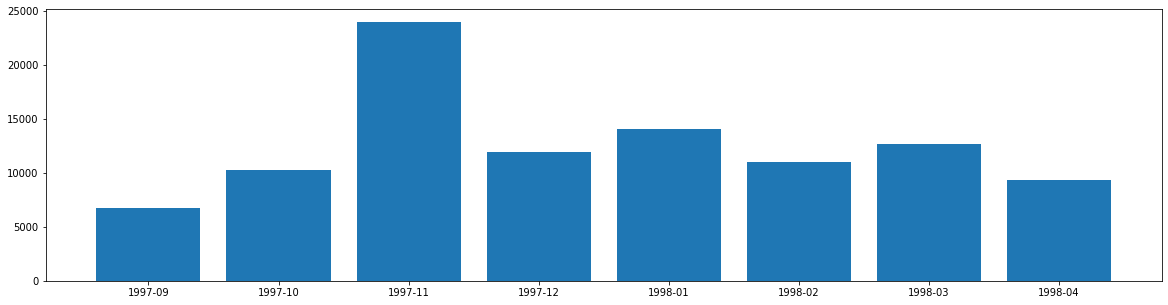

In [235]:
plt.figure(figsize=(20,5))
plt.bar(year_d, count_i, data = df_data_2)
plt.show()

**Выявить top-5 самых активных пользователей (больше всего оценок) за последние 3 месяца**

In [260]:
df_data_3 = spark.sql('SELECT user_id, sum (rating) as sum_rating  FROM data WHERE (month_year  = "1998-02") or (month_year = "1998-03") or (month_year = "1998-04") GROUP BY user_id ORDER BY sum_rating DESC').show(5)

+-------+----------+
|user_id|sum_rating|
+-------+----------+
|    655|    1992.0|
|      7|    1598.0|
|     59|    1503.0|
|    234|    1499.0|
|    393|    1495.0|
+-------+----------+
only showing top 5 rows

